In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Ссылка на датасет
url = 'https://raw.githubusercontent.com/injchernomor/ml-libraries-project/refs/heads/dev/data-source/data/final_dataset_of_encrypted_words.csv'
df = pd.read_csv(url)
df.head()

,encrypted_word,encryption_algorithm
0,zrug,сaesar
1,deedfb,сaesar
2,degxfwru,сaesar
3,dedv,сaesar
4,dedvhphqw,сaesar


In [3]:
# првоерка на наличие пропущенных строк
df.isnull().sum()

,0
encrypted_word,0
encryption_algorithm,0


In [4]:
# Подсчет уникальных значений
df["encryption_algorithm"].value_counts()

,count
encryption_algorithm,
сaesar,42053
sha256,42053


In [5]:
# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(df['encrypted_word'], df['encryption_algorithm'], test_size=0.100195, random_state=42)

In [6]:
# преобразование отображения данных из текста в числовые значения по Y
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.fit_transform(Y_test)

In [7]:
# преобразование отображения данных из текста в числовые значения по X
encoder = LabelEncoder()
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df["encrypted_word"])

X_train_Tfidf = Tfidf_vect.transform(X_train)
X_test_Tfidf = Tfidf_vect.transform(X_test)
#print(Tfidf_vect.vocabulary_)
#print(X_train_Tfidf)

In [8]:
# Обучение наивного байесовского классификатора
model = MultinomialNB(alpha=0.1)
model.fit(X_train_Tfidf, Y_train)

MultinomialNB(alpha=0.1)

In [9]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test_Tfidf)
predictions_NB = model.predict(X_test_Tfidf)
print(f"SVM accuracy score: {accuracy_score(predictions_NB,Y_test)*100}")

SVM accuracy score: 50.10678690080683


In [10]:
# Вывод отчета о классификации и матрицы замешивания
print("Classification Report:")
print(classification_report(Y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      4211
           1       1.00      0.00      0.01      4217

    accuracy                           0.50      8428
   macro avg       0.75      0.50      0.34      8428
weighted avg       0.75      0.50      0.34      8428

Confusion Matrix:
[[4211    0]
 [4205   12]]


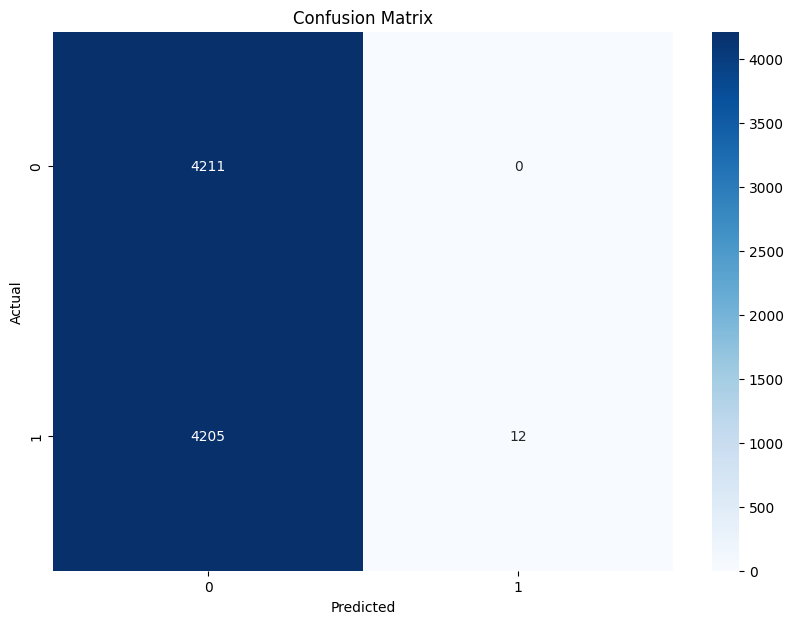

In [11]:
# Вывод отчета графиком
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()